In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [2]:
print(tf.__version__)

2.8.0


In [3]:
tfds.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'arc',
 'bair_robot_pushing_small',
 'bccd',
 'beans',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'blimp',
 'bool_q',
 'c4',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'cherry_blossoms',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar10_1',
 'cifar10_corrupted',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'clic',
 'clinc_oos',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coco_captions',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'common_voice',
 'coqa',
 'cos_e',
 'cosmos_qa',
 'covid19',
 'covid19sum',
 'crema_d',
 'curated_breast_imaging_ddsm',
 'cycle_gan',
 'd4rl_adroit_door',
 'd4rl_adroit_hammer',
 'd4rl_adroit_pen',
 'd4rl_adroit_relocate',
 'd4rl_mujoco_ant',
 'd4

In [4]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
print("ag_news_subset" in tfds.list_builders())

True


In [6]:
(train_data, test_data), metadata = tfds.load("ag_news_subset", 
                                              with_info=True, 
                                              as_supervised=True, 
                                              split=["train", "test"], 
                                              shuffle_files=False)

In [7]:
metadata.features["label"].names

['World', 'Sports', 'Business', 'Sci/Tech']

In [8]:
class_names = metadata.features["label"].names

In [9]:
num_examples = metadata.splits["train"].num_examples
num_examples

120000

In [10]:
train_data

<PrefetchDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [11]:
for data in train_data.take(3):
    sent, label = data
    print(sent, label)
    print()

tf.Tensor(b'AMD #39;s new dual-core Opteron chip is designed mainly for corporate computing applications, including databases, Web services, and financial transactions.', shape=(), dtype=string) tf.Tensor(3, shape=(), dtype=int64)

tf.Tensor(b'Reuters - Major League Baseball\\Monday announced a decision on the appeal filed by Chicago Cubs\\pitcher Kerry Wood regarding a suspension stemming from an\\incident earlier this season.', shape=(), dtype=string) tf.Tensor(1, shape=(), dtype=int64)

tf.Tensor(b'President Bush #39;s  quot;revenue-neutral quot; tax reform needs losers to balance its winners, and people claiming the federal deduction for state and local taxes may be in administration planners #39; sights, news reports say.', shape=(), dtype=string) tf.Tensor(2, shape=(), dtype=int64)



In [12]:
import numpy as np
train_sentences = []
train_labels =  []
for data in train_data.as_numpy_iterator():
    sentence, label = data
    train_sentences.append(sentence)
    train_labels.append(label)

In [13]:
len(train_sentences), len(train_labels)

(120000, 120000)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
train_sentences, val_sentences, train_labels, val_labels = train_test_split(np.array(train_sentences), 
                                                                            np.array(train_labels),
                                                                            test_size=0.2,
                                                                            random_state=42)

In [16]:
train_sentences[0], train_labels[0]

(b'Oil futures prices bolted 5 percent higher yesterday, climbing above \\$44 a barrel after US government data showed a slight decline in crude and heating oil supplies ',
 2)

In [17]:
from tensorflow.keras import layers

In [18]:
sentence_length = [len(text.split()) for text in train_sentences]
sentence_mean_length = np.mean(sentence_length)
sentence_mean_length

31.06790625

In [19]:
max_vocab = 10000
max_length = int(np.percentile(sentence_length, 95))
max_length

45

In [20]:
text_vectorizor = layers.TextVectorization(max_tokens=max_vocab,
                                           output_mode="int",
                                           output_sequence_length=max_length)

In [21]:
text_vectorizor.adapt(train_sentences)

In [22]:
import random

In [23]:
sample_sentence = random.choice(train_sentences)
text_vectorizor([sample_sentence])

<tf.Tensor: shape=(1, 45), dtype=int64, numpy=
array([[   2, 1323,   75,   27,    1,    6, 2540,   26,   31,  341,    9,
           2,  643, 1676,   10,    1,    4,    2,    1, 2211,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0]], dtype=int64)>

In [24]:
len(text_vectorizor.get_vocabulary())

10000

In [25]:
words_in_vocab = text_vectorizor.get_vocabulary()

In [26]:
words_in_vocab[:5], words_in_vocab[-5:]

(['', '[UNK]', 'the', 'a', 'to'],
 ['terminal',
  'tenth',
  'temperature',
  'taxing',
  'targetstocksquickinfofullquotegtmmcnltagt'])

In [27]:
text_embedding = layers.Embedding(input_dim=max_vocab,
                                  output_dim=128,
                                  input_length=max_length,
                                  mask_zero=True)

In [28]:
text_embedding(text_vectorizor([sample_sentence]))

<tf.Tensor: shape=(1, 45, 128), dtype=float32, numpy=
array([[[-0.04085212, -0.00417141,  0.02748472, ..., -0.04044526,
          0.02812858,  0.0303327 ],
        [ 0.02315641,  0.01602769, -0.03223325, ...,  0.01993481,
          0.03317058,  0.02456108],
        [ 0.02036578, -0.02145822, -0.02331859, ...,  0.00377025,
          0.00629511, -0.02652284],
        ...,
        [ 0.03571234,  0.02351517,  0.01079812, ...,  0.02547474,
          0.02602999,  0.04793067],
        [ 0.03571234,  0.02351517,  0.01079812, ...,  0.02547474,
          0.02602999,  0.04793067],
        [ 0.03571234,  0.02351517,  0.01079812, ...,  0.02547474,
          0.02602999,  0.04793067]]], dtype=float32)>

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_recall_fscore_support

def evaluate_classification_model(y_true, y_preds):
    """
    Evaluate a classification model for binary/multi-class classification.

    Parameters:
    - y_true: 1D array or list of actual values.
    - y_preds: 1D array or list of predicted values.

    Returns:
    - evaluation_results: Dictionary containing evaluation metrics.
    """
    acc = accuracy_score(y_true, y_preds)
    pre, rec, f1, _ = precision_recall_fscore_support(y_true, y_preds, average="weighted")
    return {"acc": acc,
            "pre": pre,
            "rec": rec,
            "f1": f1}

In [30]:
type(train_sentences), type(train_labels)

(numpy.ndarray, numpy.ndarray)

In [31]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_sentences, train_labels)).batch(32).prefetch(tf.data.AUTOTUNE)
val_dataset = tf.data.Dataset.from_tensor_slices((val_sentences, val_labels)).batch(32).prefetch(tf.data.AUTOTUNE)

In [32]:
train_dataset

<PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [46]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

baseline_model = Pipeline([
    ("tfid", TfidfVectorizer()),
    ("clf", MultinomialNB())
])

baseline_model.fit(train_sentences, train_labels)

Pipeline(steps=[('tfid', TfidfVectorizer()), ('clf', MultinomialNB())])

In [47]:
baseline_model.score(val_sentences, val_labels)

0.8975833333333333

In [48]:
baseline_model_preds = baseline_model.predict(val_sentences)
baseline_model_preds

array([2, 3, 2, ..., 2, 0, 3], dtype=int64)

In [49]:
val_labels

array([2, 3, 2, ..., 2, 0, 0], dtype=int64)

In [50]:
baseline_model_results = evaluate_classification_model(val_labels, baseline_model_preds)
baseline_model_results

{'acc': 0.8975833333333333,
 'pre': 0.8974104767422689,
 'rec': 0.8975833333333333,
 'f1': 0.8973931524495389}

In [51]:
tf.keras.backend.clear_session()

inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizor(inputs)
x = text_embedding(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(len(class_names), activation="softmax")(x)

model_1 = tf.keras.Model(inputs, outputs, name="model_1")

In [52]:
model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 45)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 45, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 4)                 516       
                                                                 
Total params: 1,280,516
Trainable params: 1,280,516
Non-tra

In [53]:
model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics="accuracy")

model_1_history = model_1.fit(train_dataset,
                              validation_data=val_dataset,
                              epochs=10)

Epoch 1/10
3000/3000 [==============================] - 19s 6ms/step - loss: 0.4230 - accuracy: 0.8773 - val_loss: 0.2904 - val_accuracy: 0.9047
Epoch 2/10
3000/3000 [==============================] - 17s 6ms/step - loss: 0.2518 - accuracy: 0.9160 - val_loss: 0.2863 - val_accuracy: 0.9046
Epoch 3/10
3000/3000 [==============================] - 17s 6ms/step - loss: 0.2197 - accuracy: 0.9253 - val_loss: 0.2983 - val_accuracy: 0.9004
Epoch 4/10
3000/3000 [==============================] - 18s 6ms/step - loss: 0.2014 - accuracy: 0.9315 - val_loss: 0.3137 - val_accuracy: 0.8979
Epoch 5/10
3000/3000 [==============================] - 18s 6ms/step - loss: 0.1891 - accuracy: 0.9357 - val_loss: 0.3299 - val_accuracy: 0.8943
Epoch 6/10
3000/3000 [==============================] - 19s 6ms/step - loss: 0.1800 - accuracy: 0.9392 - val_loss: 0.3462 - val_accuracy: 0.8914
Epoch 7/10
3000/3000 [==============================] - 19s 6ms/step - loss: 0.1728 - accuracy: 0.9417 - val_loss: 0.3621 - val_ac

In [59]:
model_1_preds = tf.argmax(model_1.predict(val_dataset), axis=1)
model_1_preds

<tf.Tensor: shape=(24000,), dtype=int64, numpy=array([2, 3, 2, ..., 2, 0, 3], dtype=int64)>

In [60]:
model_1_preds

<tf.Tensor: shape=(24000,), dtype=int64, numpy=array([2, 3, 2, ..., 2, 0, 3], dtype=int64)>

In [61]:
model_1_results = evaluate_classification_model(val_labels, model_1_preds)
model_1_results

{'acc': 0.8826666666666667,
 'pre': 0.8831185127830619,
 'rec': 0.8826666666666667,
 'f1': 0.8828313920326015}

In [81]:
tf.keras.backend.clear_session()

inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizor(inputs)
x = text_embedding(x)
x = layers.LSTM(64, return_sequences=True)(x)
x = layers.LSTM(64)(x)
outputs = layers.Dense(len(class_names), activation="softmax")(x)

model_2 = tf.keras.Model(inputs, outputs, name="model_2")

In [82]:
model_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 45)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 45, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 45, 64)            49408     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 4)                 260       
                                                           

In [83]:
model_2.compile(loss="sparse_categorical_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])

model_2_history = model_2.fit(train_dataset,
                              validation_data=val_dataset,
                              epochs=5)

Epoch 1/5
3000/3000 [==============================] - 88s 27ms/step - loss: 0.0873 - accuracy: 0.9699 - val_loss: 0.6860 - val_accuracy: 0.8690
Epoch 2/5
3000/3000 [==============================] - 81s 27ms/step - loss: 0.0354 - accuracy: 0.9884 - val_loss: 0.7299 - val_accuracy: 0.8640
Epoch 3/5
3000/3000 [==============================] - 84s 28ms/step - loss: 0.0311 - accuracy: 0.9899 - val_loss: 0.8483 - val_accuracy: 0.8493
Epoch 4/5
3000/3000 [==============================] - 86s 29ms/step - loss: 0.0279 - accuracy: 0.9914 - val_loss: 0.8252 - val_accuracy: 0.8565
Epoch 5/5
3000/3000 [==============================] - 87s 29ms/step - loss: 0.0244 - accuracy: 0.9923 - val_loss: 0.7867 - val_accuracy: 0.8622


In [87]:
model_2_preds = tf.argmax(model_2.predict(val_dataset), axis=1)
model_2_results = evaluate_classification_model(val_labels, model_2_preds)
model_2_results

{'acc': 0.8602916666666667,
 'pre': 0.862262106566085,
 'rec': 0.8602916666666667,
 'f1': 0.8603818230153875}

In [84]:
tf.keras.backend.clear_session()

inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizor(inputs)
x = text_embedding(x)
x = layers.Conv1D(10, 3, activation="relu")(x)
x = layers.MaxPooling1D(2)(x)
x = layers.Conv1D(10, 3, activation="relu")(x)
x = layers.MaxPooling1D(2)(x)
x = layers.Flatten()(x)
outputs = layers.Dense(len(class_names), activation="softmax")(x)

model_3 = tf.keras.Model(inputs, outputs, name="model_3")

In [85]:
model_3.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 45)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 45, 128)           1280000   
                                                                 
 conv1d (Conv1D)             (None, 43, 10)            3850      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 21, 10)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 19, 10)            310 

In [86]:
model_3.compile(loss="sparse_categorical_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])

model_3_history = model_3.fit(train_dataset,
                              validation_data=val_dataset,
                              epochs=3)

Epoch 1/3
3000/3000 [==============================] - 26s 9ms/step - loss: 0.2068 - accuracy: 0.9251 - val_loss: 0.4228 - val_accuracy: 0.8770
Epoch 2/3
3000/3000 [==============================] - 24s 8ms/step - loss: 0.1227 - accuracy: 0.9573 - val_loss: 0.5195 - val_accuracy: 0.8702
Epoch 3/3
3000/3000 [==============================] - 25s 8ms/step - loss: 0.0859 - accuracy: 0.9720 - val_loss: 0.6483 - val_accuracy: 0.8668


In [88]:
model_3_preds = tf.argmax(model_3.predict(val_dataset), axis=1)
model_3_results = evaluate_classification_model(val_labels, model_3_preds)
model_3_results

{'acc': 0.86675,
 'pre': 0.8681200453835706,
 'rec': 0.86675,
 'f1': 0.8667451424299552}

In [108]:
tf.keras.backend.clear_session()

inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizor(inputs)
x = text_embedding(x)
x = layers.Bidirectional(layers.LSTM(16, return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(16))(x)
outputs = layers.Dense(len(class_names), activation="softmax")(x)

model_4 = tf.keras.Model(inputs, outputs, name="model_4")

In [71]:
model_4.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 45)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 45, 128)           1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 45, 32)           18560     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 32)               6272      
 nal)                                                            
                                                           

In [72]:
model_4.compile(loss="sparse_categorical_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])

model_4_history = model_4.fit(train_dataset,
                              validation_data=val_dataset,
                              epochs=5)

Epoch 1/5
3000/3000 [==============================] - 158s 49ms/step - loss: 0.1344 - accuracy: 0.9553 - val_loss: 0.4798 - val_accuracy: 0.8748
Epoch 2/5
3000/3000 [==============================] - 150s 50ms/step - loss: 0.0652 - accuracy: 0.9776 - val_loss: 0.5820 - val_accuracy: 0.8699
Epoch 3/5
3000/3000 [==============================] - 153s 51ms/step - loss: 0.0479 - accuracy: 0.9841 - val_loss: 0.6490 - val_accuracy: 0.8705
Epoch 4/5
3000/3000 [==============================] - 156s 52ms/step - loss: 0.0405 - accuracy: 0.9864 - val_loss: 0.6677 - val_accuracy: 0.8714
Epoch 5/5
3000/3000 [==============================] - 162s 54ms/step - loss: 0.0342 - accuracy: 0.9886 - val_loss: 0.6976 - val_accuracy: 0.8700


In [73]:
model_4_preds = tf.argmax(model_4.predict(val_dataset), axis=1)
model_4_results = evaluate_classification_model(val_labels, model_4_preds)
model_4_results

{'acc': 0.87, 'pre': 0.8709918534041641, 'rec': 0.87, 'f1': 0.8702165052972917}

In [74]:
tf.keras.backend.clear_session()

inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizor(inputs)
x = text_embedding(x)
x = layers.GRU(32, return_sequences=True)(x)
x = layers.GRU(32)(x)
outputs = layers.Dense(len(class_names), activation="softmax")(x)

model_5 = tf.keras.Model(inputs, outputs, name="model_5")

In [75]:
model_5.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 45)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 45, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 45, 32)            15552     
                                                                 
 gru_1 (GRU)                 (None, 32)                6336      
                                                                 
 dense (Dense)               (None, 4)                 132       
                                                           

In [76]:
model_5.compile(loss="sparse_categorical_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])

model_5_history = model_5.fit(train_dataset, 
                              validation_data=val_dataset,
                              epochs=5)

Epoch 1/5
3000/3000 [==============================] - 105s 32ms/step - loss: 0.1235 - accuracy: 0.9562 - val_loss: 0.5647 - val_accuracy: 0.8695
Epoch 2/5
3000/3000 [==============================] - 95s 32ms/step - loss: 0.0487 - accuracy: 0.9834 - val_loss: 0.6987 - val_accuracy: 0.8680
Epoch 3/5
3000/3000 [==============================] - 95s 32ms/step - loss: 0.0370 - accuracy: 0.9874 - val_loss: 0.7471 - val_accuracy: 0.8675
Epoch 4/5
3000/3000 [==============================] - 96s 32ms/step - loss: 0.0335 - accuracy: 0.9888 - val_loss: 0.7835 - val_accuracy: 0.8670
Epoch 5/5
3000/3000 [==============================] - 93s 31ms/step - loss: 0.0314 - accuracy: 0.9895 - val_loss: 0.8344 - val_accuracy: 0.8638


In [77]:
model_5_preds = tf.argmax(model_5.predict(val_dataset), axis=1)
model_5_results = evaluate_classification_model(val_labels, model_5_preds)
model_5_results

{'acc': 0.8638333333333333,
 'pre': 0.8649015383972944,
 'rec': 0.8638333333333333,
 'f1': 0.8640326728012026}

In [33]:
from transformers import BertTokenizer, TFBertForSequenceClassification

In [34]:
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased')

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [73]:
bert_model.trainable = False

In [74]:
for layer in bert_model.layers:
    print(layer.name, layer.trainable)

bert False
dropout_37 False
classifier False


In [46]:
type(train_sentences)

numpy.ndarray

In [61]:
type(train_sentences), type(train_sentences[0])

(numpy.ndarray, numpy.bytes_)

In [50]:
train_sentences_list = train_sentences.astype(str).tolist()

In [53]:
type(train_sentences_list[0])

str

In [79]:
train_sentences_bert = bert_tokenizer(train_sentences_list, padding=True, truncation=True, return_tensors="tf")["input_ids"]

In [80]:
val_sentences_bert = bert_tokenizer(val_sentences.astype(str).tolist(), padding=True, truncation=True, return_tensors="tf")["input_ids"]

In [81]:
train_sentences_bert

<tf.Tensor: shape=(96000, 372), dtype=int32, numpy=
array([[  101,  3514, 17795, ...,     0,     0,     0],
       [  101,  2149, 13095, ...,     0,     0,     0],
       [  101,  5522,  1006, ...,     0,     0,     0],
       ...,
       [  101,  7211,  1006, ...,     0,     0,     0],
       [  101,  6950,  2012, ...,     0,     0,     0],
       [  101,  9274,  2097, ...,     0,     0,     0]])>

In [83]:
train_bert_dataset = tf.data.Dataset.from_tensor_slices((train_sentences_bert, train_labels)).batch(32).prefetch(tf.data.AUTOTUNE)
val_bert_dataset = tf.data.Dataset.from_tensor_slices((val_sentences_bert, val_labels)).batch(32).prefetch(tf.data.AUTOTUNE)

In [84]:
train_bert_dataset

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 372), dtype=tf.int32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [89]:
tf.keras.backend.clear_session()

inputs = layers.Input(shape=(372,), dtype=tf.int32)
x = bert_model(inputs)["logits"]
outputs = layers.Dense(len(class_names), activation="softmax")(x)

model_bert = tf.keras.Model(inputs, outputs, name="model_bert")

In [90]:
model_bert.summary()

Model: "model_bert"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 372)]             0         
                                                                 
 tf_bert_for_sequence_classi  TFSequenceClassifierOutp  109483778
 fication (TFBertForSequence  ut(loss=None, logits=(No           
 Classification)             ne, 2),                             
                              hidden_states=None, att            
                             entions=None)                       
                                                                 
 dense (Dense)               (None, 4)                 12        
                                                                 
Total params: 109,483,790
Trainable params: 12
Non-trainable params: 109,483,778
_________________________________________________________________


In [87]:
model_bert.compile(loss="sparse_categorical_crossentropy",
                   optimizer="adam",
                   metrics=["accuracy"])

model_bert_history = model_bert.fit(train_bert_dataset,
                                    validation_data=val_bert_dataset,
                                    epochs=3)

Epoch 1/3
  65/3000 [..............................] - ETA: 1:25:36 - loss: 1.4123 - accuracy: 0.2466

KeyboardInterrupt: 

In [102]:
train_10_percent = int(len(train_sentences) * 0.1)
train_10_percent

9600

In [103]:
train_sentences_10_percent = train_sentences[:train_10_percent]
train_labels_10_percent = train_labels[:train_10_percent]

In [105]:
import pandas as pd

In [106]:
pd.DataFrame(train_labels_10_percent).value_counts()

3    2434
1    2431
2    2384
0    2351
Name: count, dtype: int64

In [107]:
train_dataset_10_percent = tf.data.Dataset.from_tensor_slices((train_sentences_10_percent, train_labels_10_percent)).batch(32).prefetch(tf.data.AUTOTUNE)

In [115]:
tf.keras.backend.clear_session()

inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizor(inputs)
x = text_embedding(x)
x = layers.Bidirectional(layers.LSTM(16, return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(16))(x)
outputs = layers.Dense(len(class_names), activation="softmax")(x)

model_6 = tf.keras.Model(inputs, outputs, name="model_6")

In [116]:
model_6.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 45)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 45, 128)           1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 45, 32)           18560     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 32)               6272      
 nal)                                                            
                                                           

In [117]:
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-6 * 10 ** (epoch/20))

In [118]:
model_6_init_weights = model_6.get_weights()

In [119]:
model_6.compile(loss="sparse_categorical_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])

In [120]:
model_6_history = model_6.fit(train_dataset_10_percent,
                              validation_data=val_dataset,
                              validation_steps=int(len(val_dataset) * 0.1),
                              epochs=100,
                              callbacks=[lr_scheduler])

Epoch 1/100
300/300 [==============================] - 28s 54ms/step - loss: 1.3859 - accuracy: 0.2655 - val_loss: 1.3862 - val_accuracy: 0.2612 - lr: 1.0000e-06
Epoch 2/100
300/300 [==============================] - 12s 42ms/step - loss: 1.3857 - accuracy: 0.2738 - val_loss: 1.3860 - val_accuracy: 0.2692 - lr: 1.1220e-06
Epoch 3/100
300/300 [==============================] - 13s 43ms/step - loss: 1.3854 - accuracy: 0.2837 - val_loss: 1.3857 - val_accuracy: 0.2788 - lr: 1.2589e-06
Epoch 4/100
300/300 [==============================] - 14s 45ms/step - loss: 1.3851 - accuracy: 0.2947 - val_loss: 1.3854 - val_accuracy: 0.2883 - lr: 1.4125e-06
Epoch 5/100
300/300 [==============================] - 13s 45ms/step - loss: 1.3848 - accuracy: 0.3069 - val_loss: 1.3851 - val_accuracy: 0.2992 - lr: 1.5849e-06
Epoch 6/100
300/300 [==============================] - 14s 46ms/step - loss: 1.3844 - accuracy: 0.3215 - val_loss: 1.3848 - val_accuracy: 0.3113 - lr: 1.7783e-06
Epoch 7/100
300/300 [=======

In [121]:
import matplotlib.pyplot as plt

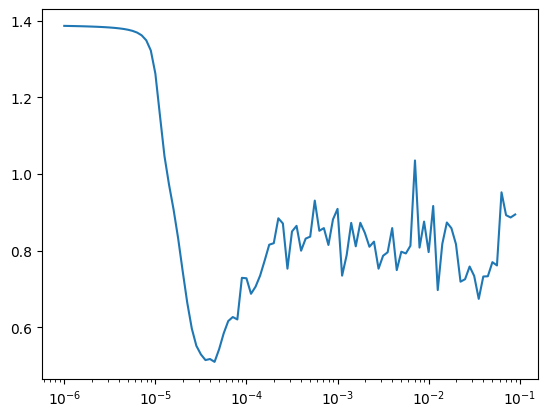

In [123]:
lrs = 1e-6 * 10 ** (tf.range(100)/20)
plt.semilogx(lrs, model_6_history.history["val_loss"])

In [124]:
model_6.set_weights(model_6_init_weights)

In [125]:
model_6.compile(loss="sparse_categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.00002),
                metrics=["accuracy"])

In [35]:
import os

In [36]:
def checkpoint(model_name):
    return tf.keras.callbacks.ModelCheckpoint(monitor="val_loss", 
                                              filepath=os.path.join("h5_models/ag_news/", model_name + ".h5"), 
                                              save_best_only=True)

early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", restore_best_weights=True, patience=5)

In [128]:
model_6_history = model_6.fit(train_dataset,
                              validation_data=val_dataset,
                              validation_steps=int(len(val_dataset) * 0.1),
                              epochs=100,
                              callbacks=[early_stopping, checkpoint(model_6.name)])

Epoch 1/100
2999/3000 [============================>.] - ETA: 0s - loss: 1.0875 - accuracy: 0.5707

NotImplementedError: Save or restore weights that is not an instance of `tf.Variable` is not supported in h5, use `save_format='tf'` instead. Received a model or layer TextVectorization with weights [<keras.layers.preprocessing.index_lookup.VocabWeightHandler object at 0x000001E688E6F370>]

In [ ]:
model_6.evaluate(val_dataset)

In [ ]:
model_6.evaluate(train_dataset)

In [ ]:
model_6_preds = tf.argmax(model_6.predict(val_dataset), axis=1)
model_6_results = evaluate_classification_model(val_labels, model_6_preds)
model_6_results

In [44]:
tf.keras.backend.clear_session()

inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizor(inputs)
x = text_embedding(x)
x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)
x = layers.GlobalMaxPool1D()(x)
x = layers.Dense(64, activation="relu")(x)
x = layers.Dropout(0.1)(x)
outputs = layers.Dense(len(class_names), activation="softmax")(x)

model_7 = tf.keras.Model(inputs, outputs, name="model_7")

model_7.compile(loss="sparse_categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_7_history = model_7.fit(train_dataset,
                              validation_data=val_dataset,
                              validation_steps=int(len(val_dataset) * 0.1),
                              epochs=100,
                              callbacks=[early_stopping, 
                                        tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", 
                                                patience=3, 
                                                factor=0.1, 
                                                min_lr=1e-7,
                                                verbose=1)])

Epoch 1/100
3000/3000 [==============================] - 189s 58ms/step - loss: 0.1645 - accuracy: 0.9489 - val_loss: 0.3356 - val_accuracy: 0.8954 - lr: 0.0010
Epoch 2/100
3000/3000 [==============================] - 159s 53ms/step - loss: 0.1195 - accuracy: 0.9626 - val_loss: 0.4249 - val_accuracy: 0.8792 - lr: 0.0010
Epoch 3/100
3000/3000 [==============================] - 163s 54ms/step - loss: 0.0955 - accuracy: 0.9692 - val_loss: 0.4551 - val_accuracy: 0.8817 - lr: 0.0010
Epoch 4/100
3000/3000 [==============================] - ETA: 0s - loss: 0.0754 - accuracy: 0.9751
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
3000/3000 [==============================] - 169s 56ms/step - loss: 0.0754 - accuracy: 0.9751 - val_loss: 0.5010 - val_accuracy: 0.8788 - lr: 0.0010
Epoch 5/100
3000/3000 [==============================] - 158s 53ms/step - loss: 0.1114 - accuracy: 0.9606 - val_loss: 0.4020 - val_accuracy: 0.9042 - lr: 1.0000e-04
Epoch 6/100
3000/3000 [====

In [45]:
model_7_preds = tf.argmax(model_7.predict(val_dataset), axis=1)
model_7_results = evaluate_classification_model(val_labels, model_7_preds)
model_7_results

{'acc': 0.8855416666666667,
 'pre': 0.8854341318868264,
 'rec': 0.8855416666666667,
 'f1': 0.8854287662242164}

In [46]:
model_7.evaluate(train_dataset), model_7.evaluate(val_dataset)

750/750 [==============================] - 16s 21ms/step - loss: 0.3758 - accuracy: 0.8855


([0.21071183681488037, 0.9315937757492065],
 [0.37576863169670105, 0.8855416774749756])

In [40]:
tf.keras.backend.clear_session()

inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizor(inputs)
x = text_embedding(x)
x = layers.LSTM(60, return_sequences=True)(x)
x = layers.GlobalMaxPool1D()(x)
x = layers.Dropout(0.1)(x)
x = layers.Dense(50, activation="relu")(x)
x = layers.Dropout(0.1)(x)
outputs = layers.Dense(len(class_names), activation="softmax")(x)

model_8 = tf.keras.Model(inputs, outputs, name="model_8")

model_8.compile(loss="sparse_categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_8_history = model_8.fit(train_dataset,
                              validation_data=val_dataset,
                              validation_steps=int(len(val_dataset) * 0.1),
                              epochs=100,
                              callbacks=[early_stopping, 
                                        tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", 
                                                patience=3, 
                                                factor=0.1, 
                                                min_lr=1e-7,
                                                verbose=1)])

Epoch 1/100
3000/3000 [==============================] - 51s 16ms/step - loss: 0.2198 - accuracy: 0.9305 - val_loss: 0.2839 - val_accuracy: 0.9033 - lr: 0.0010
Epoch 2/100
3000/3000 [==============================] - 48s 16ms/step - loss: 0.1605 - accuracy: 0.9482 - val_loss: 0.3207 - val_accuracy: 0.8908 - lr: 0.0010
Epoch 3/100
3000/3000 [==============================] - 57s 19ms/step - loss: 0.1304 - accuracy: 0.9575 - val_loss: 0.3795 - val_accuracy: 0.8867 - lr: 0.0010
Epoch 4/100
2998/3000 [============================>.] - ETA: 0s - loss: 0.1074 - accuracy: 0.9641
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
3000/3000 [==============================] - 58s 19ms/step - loss: 0.1074 - accuracy: 0.9641 - val_loss: 0.3970 - val_accuracy: 0.8871 - lr: 0.0010
Epoch 5/100
3000/3000 [==============================] - 52s 17ms/step - loss: 0.1215 - accuracy: 0.9570 - val_loss: 0.3755 - val_accuracy: 0.9000 - lr: 1.0000e-04
Epoch 6/100
3000/3000 [=========

In [41]:
model_8_preds = tf.argmax(model_8.predict(val_dataset), axis=1)
model_8_results = evaluate_classification_model(val_labels, model_8_preds)
model_8_results

{'acc': 0.8917083333333333,
 'pre': 0.8920033444327241,
 'rec': 0.8917083333333333,
 'f1': 0.8918156206195266}

In [42]:
model_8.evaluate(train_dataset), model_8.evaluate(val_dataset)

750/750 [==============================] - 5s 7ms/step - loss: 0.3181 - accuracy: 0.8917


([0.18987779319286346, 0.9350208044052124],
 [0.31814897060394287, 0.8917083144187927])

In [ ]:
tf.keras.backend.clear_session()

inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizor(inputs)
x = text_embedding(x)
x = layers.Bidirectional(layers.LSTM(128, return_sequences=True, dropout=0.3))(x)
x = layers.Bidirectional(layers.LSTM(128, dropout=0.3))(x)
x = layers.Dense(512)(x)
x = tf.keras.activations.swish(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(512)(x)
x = tf.keras.activations.swish(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(512)(x)
x = tf.keras.activations.swish(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(len(class_names), activation="softmax")(x)

model_9 = tf.keras.Model(inputs, outputs, name="model_9")

model_9.compile(loss="sparse_categorical_crossentropy",
                optimizer="rmsprop",
                metrics=["accuracy"])

model_9_history = model_9.fit(train_dataset,
                              validation_data=val_dataset,
                              validation_steps=int(len(val_dataset) * 0.1),
                              epochs=100,
                              callbacks=[early_stopping, 
                                        tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", 
                                                patience=3, 
                                                factor=0.1, 
                                                min_lr=1e-7,
                                                verbose=1)])

Epoch 1/100


In [ ]:
model_9_preds = tf.argmax(model_9.predict(val_dataset), axis=1)
model_9_results = evaluate_classification_model(val_labels, model_9_preds)
model_9_results

In [ ]:
model_9.evaluate(train_dataset), model_9.evaluate(val_dataset)

In [38]:
tf.keras.backend.clear_session()

inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizor(inputs)
x = text_embedding(x)
x = layers.Conv1D(64, 3, activation="relu")(x)
x = layers.Conv1D(64, 3, activation="relu")(x)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(32, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(len(class_names), activation="softmax")(x)

model_10 = tf.keras.Model(inputs, outputs, name="model_10")

model_10.compile(loss="sparse_categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_10_history = model_10.fit(train_dataset,
                                validation_data=val_dataset,
                                validation_steps=int(len(val_dataset) * 0.1),
                                epochs=50,
                                callbacks=[early_stopping, 
                                           tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", 
                                                                                patience=3, 
                                                                                factor=0.1, 
                                                                                min_lr=1e-7,
                                                                                verbose=1)])

Epoch 1/50
3000/3000 [==============================] - 26s 8ms/step - loss: 0.7923 - accuracy: 0.6250 - val_loss: 0.5836 - val_accuracy: 0.7079 - lr: 0.0010
Epoch 2/50
3000/3000 [==============================] - 25s 8ms/step - loss: 0.5930 - accuracy: 0.7091 - val_loss: 0.4937 - val_accuracy: 0.8037 - lr: 0.0010
Epoch 3/50
3000/3000 [==============================] - 26s 9ms/step - loss: 0.4747 - accuracy: 0.8284 - val_loss: 0.3733 - val_accuracy: 0.8708 - lr: 0.0010
Epoch 4/50
3000/3000 [==============================] - 27s 9ms/step - loss: 0.3896 - accuracy: 0.8720 - val_loss: 0.3387 - val_accuracy: 0.8829 - lr: 0.0010
Epoch 5/50
3000/3000 [==============================] - 28s 9ms/step - loss: 0.3460 - accuracy: 0.8892 - val_loss: 0.3154 - val_accuracy: 0.8938 - lr: 0.0010
Epoch 6/50
3000/3000 [==============================] - 28s 9ms/step - loss: 0.3187 - accuracy: 0.8967 - val_loss: 0.3146 - val_accuracy: 0.8900 - lr: 0.0010
Epoch 7/50
3000/3000 [==============================

In [39]:
model_10_preds = tf.argmax(model_10.predict(val_dataset), axis=1)
model_10_results = evaluate_classification_model(val_labels, model_10_preds)
model_10_results

{'acc': 0.886875,
 'pre': 0.8894414561118226,
 'rec': 0.886875,
 'f1': 0.886371917616612}

In [40]:
model_10.evaluate(train_dataset), model_10.evaluate(val_dataset)

750/750 [==============================] - 4s 5ms/step - loss: 0.3305 - accuracy: 0.8869


([0.23085449635982513, 0.921500027179718],
 [0.3304807245731354, 0.8868749737739563])

In [41]:
tf.keras.backend.clear_session()

inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizor(inputs)
x = text_embedding(x)
x = layers.Conv1D(16, 3, activation="relu", padding="causal")(x)
x = layers.Bidirectional(layers.LSTM(16, activation="relu"))(x)
x = layers.Dense(16)(x)
outputs = layers.Dense(len(class_names), activation="softmax")(x)

model_11 = tf.keras.Model(inputs, outputs, name="model_11")

model_11.compile(loss="sparse_categorical_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=["accuracy"])

model_11_history = model_11.fit(train_dataset,
                                validation_data=val_dataset,
                                validation_steps=int(len(val_dataset) * 0.1),
                                epochs=150,
                                callbacks=[early_stopping, 
                                           tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", 
                                                                                patience=3, 
                                                                                factor=0.1, 
                                                                                min_lr=1e-7,
                                                                                verbose=1)])

Epoch 1/150
  61/3000 [..............................] - ETA: 14:30 - loss: 1.2374 - accuracy: 0.4472

KeyboardInterrupt: 

In [ ]:
model_11_preds = tf.argmax(model_11.predict(val_dataset), axis=1)
model_11_results = evaluate_classification_model(val_labels, model_11_preds)
model_11_results

In [ ]:
model_11.evaluate(train_dataset), model_11.evaluate(val_dataset)